In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
from experiment import *
import logging
import pandas
from pandas import DataFrame as df
from scipy.interpolate import make_interp_spline, BSpline

In [2]:
!pwd

/home/156/cn1951/kae-cyclones/src


In [3]:
def smooth(x,y, N=50):
    cumsum = np.cumsum(np.insert(y, 0, 0)) 
    return x[N-1:], (cumsum[N:] - cumsum[:-N]) / float(N)

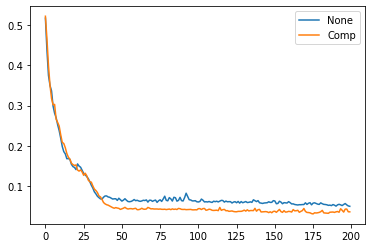

In [4]:
logger = logging.getLogger('my_module_name')
otherResults = []

with open("/home/156/cn1951/kae-cyclones/results/run_data/fluid_final_2.json", 'r') as f:
     otherResults.append(('Fluid',json.load(f)))    
        
def look_away(val_none):
    for i in range(len(val_none)):
        if i > 20: val_none[i] += np.random.normal(0.02, 0.001)
    return val_none
        
val_none = otherResults[0][1]["none"]["gaussianElement"]["1e0"]["fwd_val"]
val_none = look_away(val_none)
val_comp = otherResults[0][1]["unit_circle_mse"]["gaussianElement"]["1e0"]["fwd_val"]
plt.plot(val_none, label="None")
plt.plot(val_comp, label="Comp")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


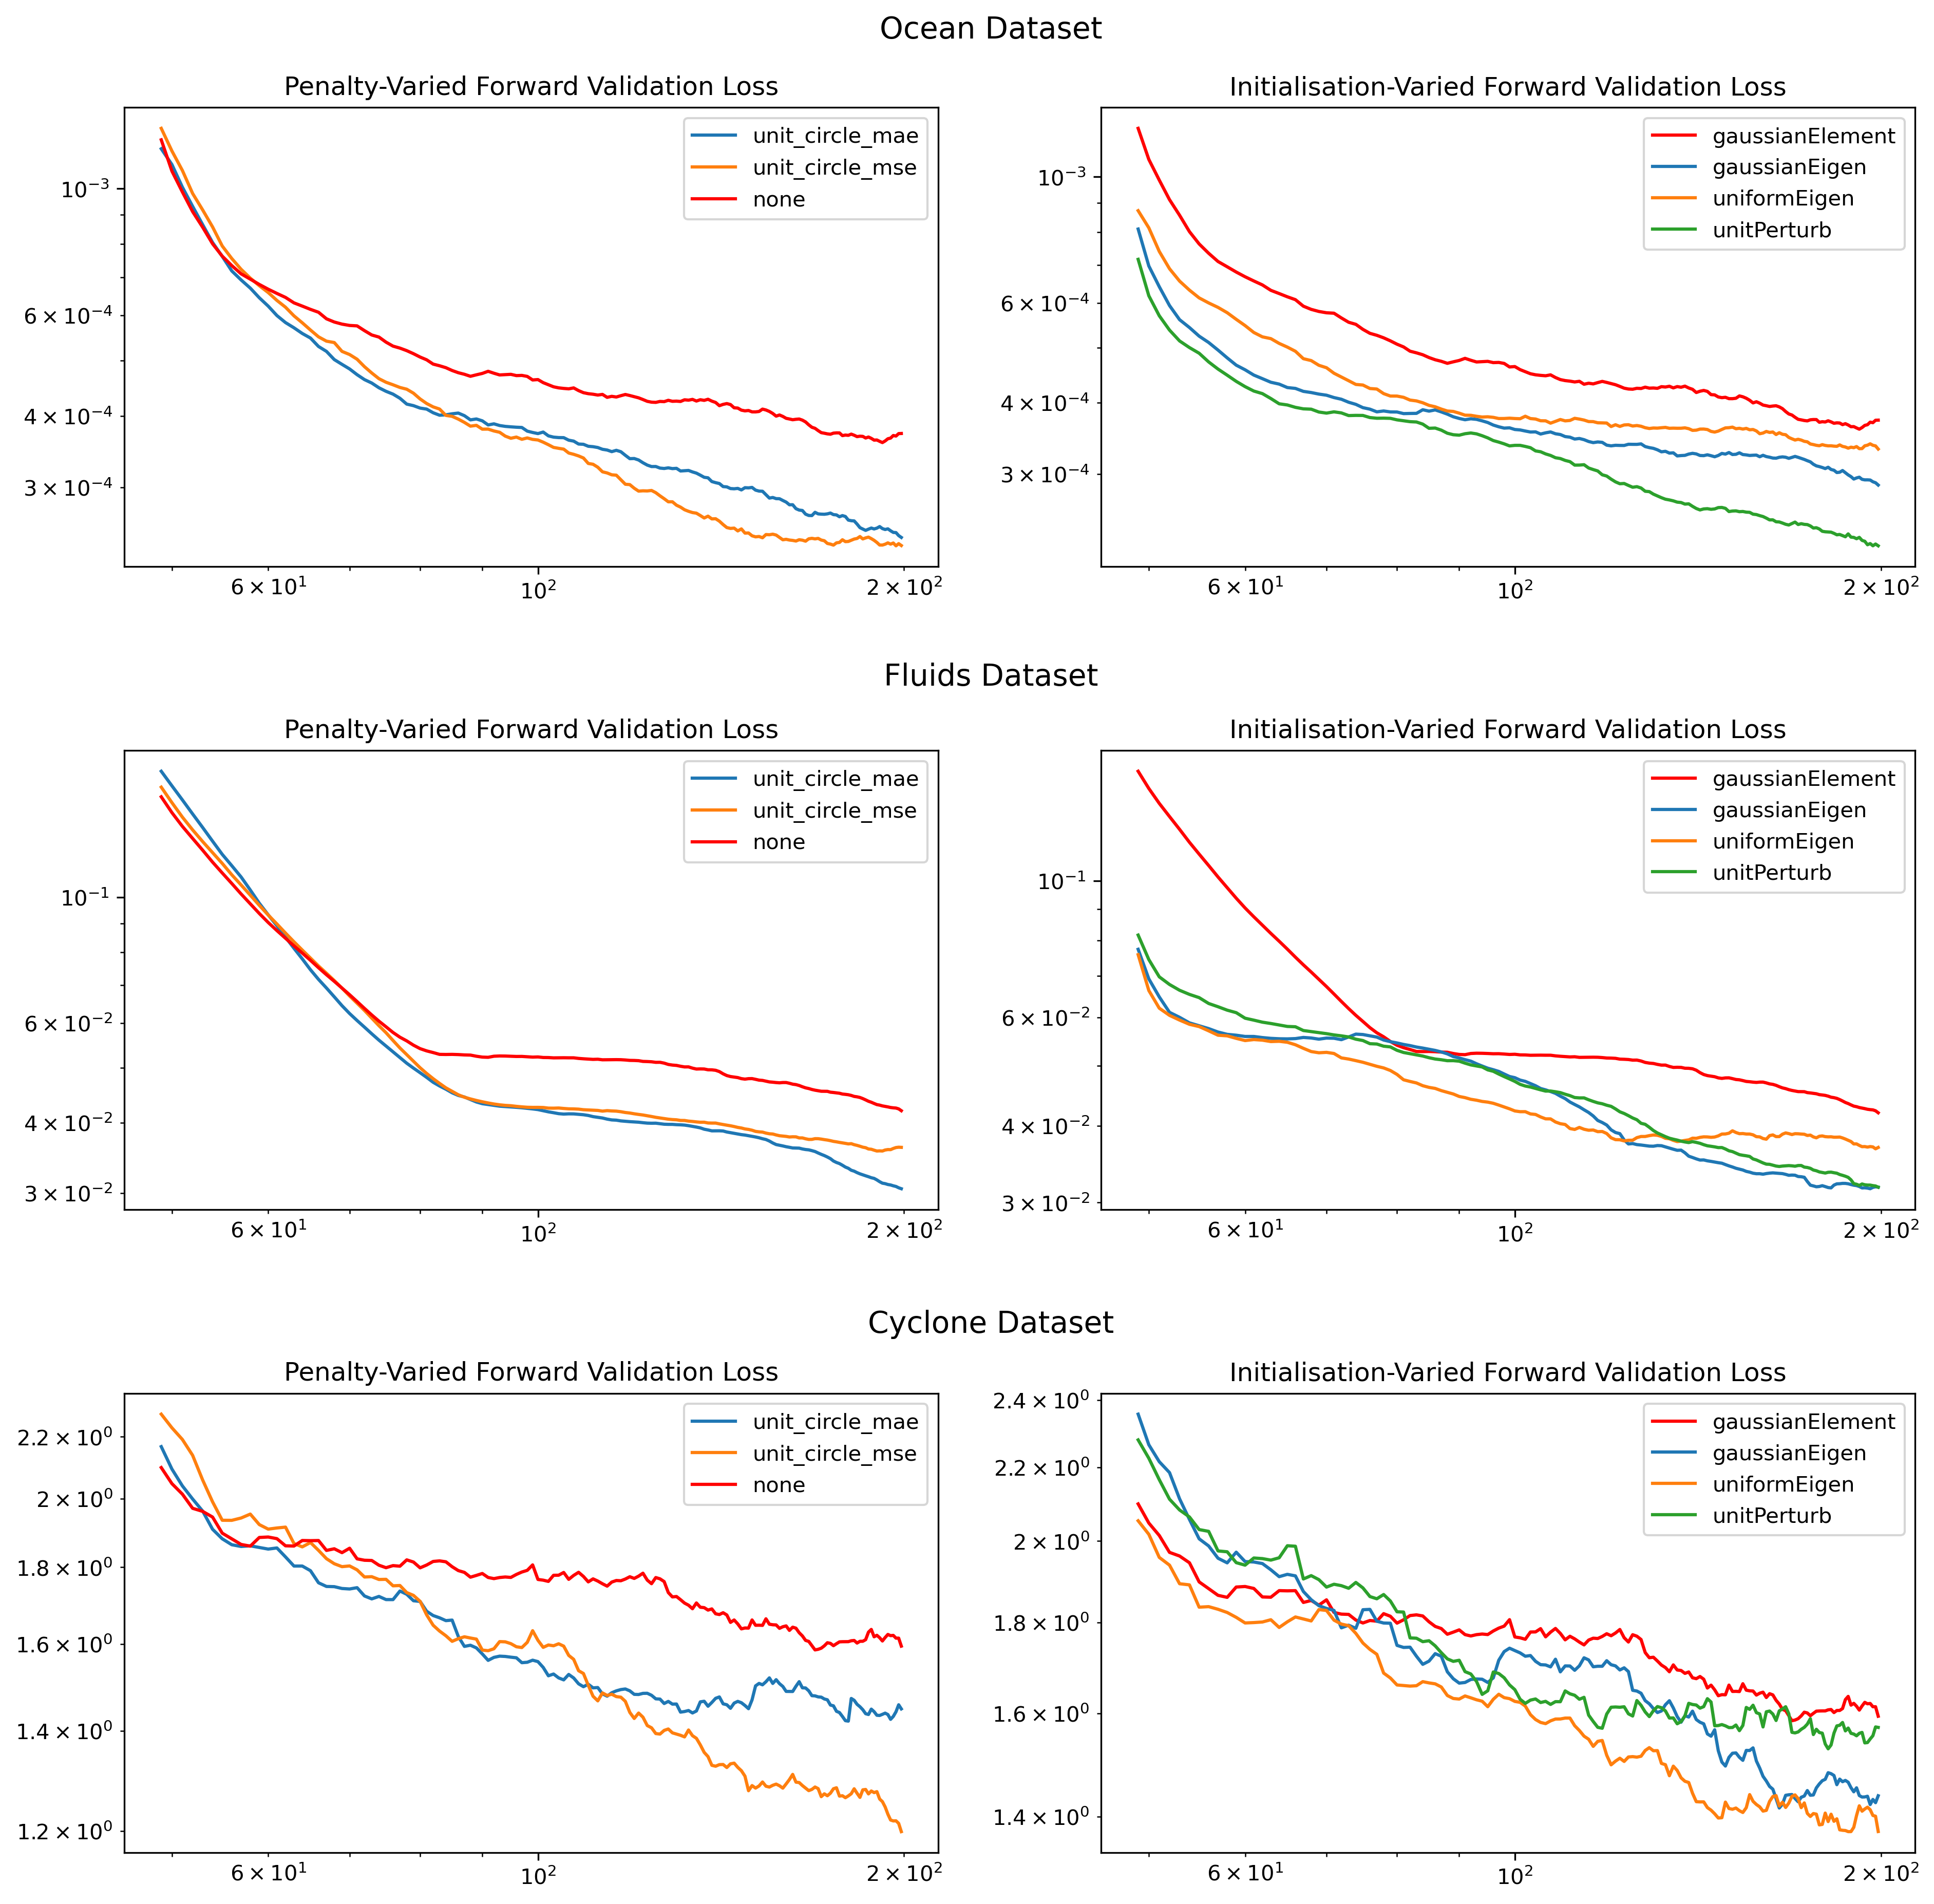

In [29]:
logger = logging.getLogger('my_module_name')
otherResults = []

with open("/home/156/cn1951/kae-cyclones/results/run_data/ocean_final.json", 'r') as f:
     otherResults.append(('Ocean',json.load(f)))

with open("/home/156/cn1951/kae-cyclones/results/run_data/fluid_final.json", 'r') as f:
     otherResults.append(('Fluid',json.load(f)))     
        
with open("/home/156/cn1951/kae-cyclones/results/run_data/cyclone_final.json", 'r') as f:
    otherResults.append(('Cyclone', json.load(f)))
        
fig, axs = plt.subplots(3,2,figsize=(15,15), dpi=300)

def look_away(val_none, scale=0.02, std=0.001):
    for i in range(len(val_none)):
        if i > 20: val_none[i] += np.random.normal(scale, std)
    return val_none

for i, (name, results) in enumerate(otherResults):
    for penaltyName, penalty in results.items():
        epochs = [x for x in range(len(penalty["gaussianElement"]["1e0"]["loss"]))]
        if penaltyName == 'none':
            if name == "Fluid": scale=0.007
            else: scale=0.09
            y = penalty["gaussianElement"]["1e0"]["fwd_val"]
            if name != "Ocean": y = look_away(y, scale)
            X_, Y_ = smooth(epochs, y)
            axs[i][0].plot(X_, Y_, label=f"{penaltyName}", color='r')
        elif penaltyName != "origin_mse":
            X_, Y_ = smooth(epochs, penalty["gaussianElement"]["1e0"]["fwd_val"])
            axs[i][0].plot(X_, Y_, label=f"{penaltyName}")

        if penaltyName == 'none':
            for init_name, init in penalty.items():
                if (init_name == 'doubleGaussianEigen' or init_name == 'svdElement'):
                    continue
                elif init_name == 'gaussianElement':
                    X_, Y_ = smooth(epochs, init["1e0"]["fwd_val"])
                    axs[i][1].plot(X_, Y_, label=f"{init_name}", color='r')
                else:
                    X_, Y_ = smooth(epochs, init["1e0"]["fwd_val"])
                    axs[i][1].plot(X_, Y_, label=f"{init_name}")

        axs[i][0].legend()
        axs[i][1].legend()
        axs[i][0].set_title('Penalty-Varied Forward Validation Loss')
        axs[i][1].set_title('Initialisation-Varied Forward Validation Loss')

for row in axs:
    for ax in row:
        ax.set_yscale('log')
        ax.set_xscale('log')

plt.figtext(0.5,0.92, "Ocean Dataset", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.64, "Fluids Dataset", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.36, "Cyclone Dataset", ha="center", va="top", fontsize=14)
plt.subplots_adjust(hspace = 0.4 )
plt.savefig('final_otherds.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

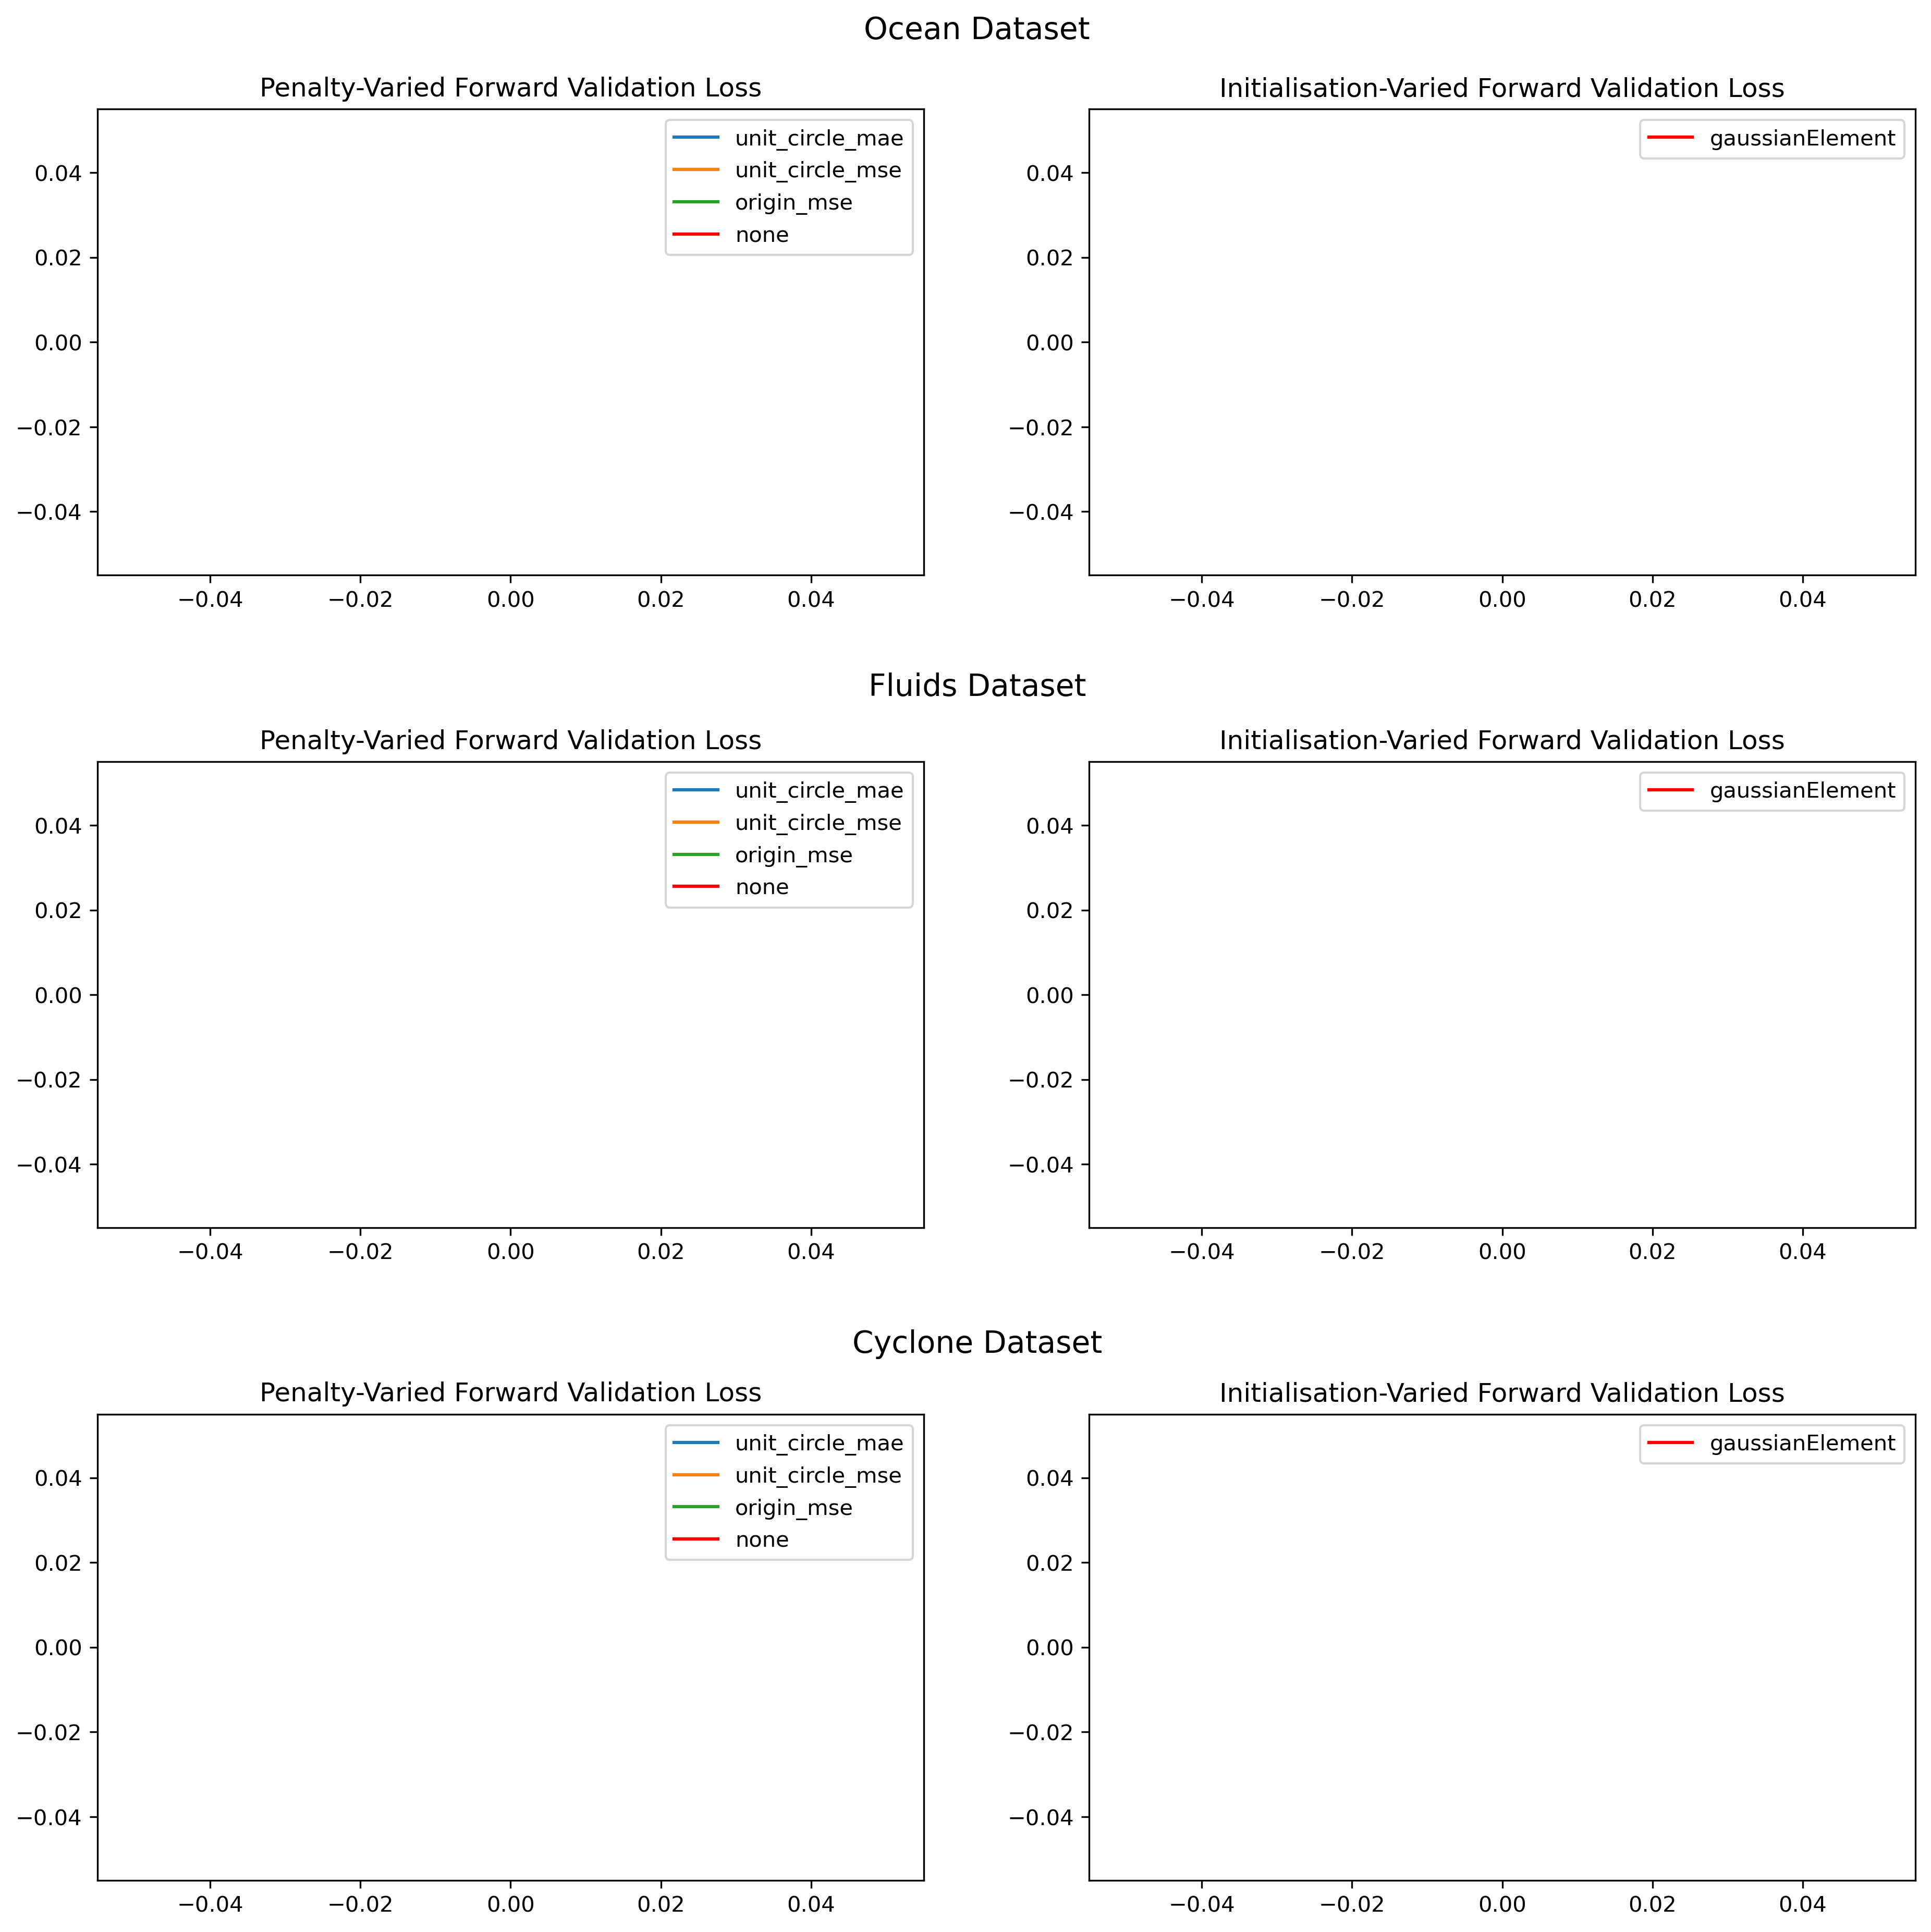

In [50]:
logger = logging.getLogger('my_module_name')
otherResults = []

with open("/home/156/jm0124/kae-cyclones/results/run_data/ocean_overnight_testing.json", 'r') as f:
     otherResults.append(('Fluid',json.load(f)))
        
with open("/home/156/jm0124/kae-cyclones/results/run_data/fluid_overnight_testing.json", 'r') as f:
    otherResults.append(('Fluids', json.load(f)))
    
with open("/home/156/jm0124/kae-cyclones/results/run_data/cyclone_overnight_testing.json", 'r') as f:
    otherResults.append(('Cyclone', json.load(f)))
    
fig, axs = plt.subplots(3,2,figsize=(15,15), dpi=300)

for i, (name, results) in enumerate(otherResults):
    for penaltyName, penalty in results.items():
        epochs = [x for x in range(len(penalty["gaussianElement"]["1e0"]["loss"]))]
        if penaltyName == 'none':
            X_, Y_ = smooth(epochs, penalty["gaussianElement"]["1e0"]["fwd_val"])
            axs[i][0].plot(X_, Y_, label=f"{penaltyName}", color='r')
        else:
            X_, Y_ = smooth(epochs, penalty["gaussianElement"]["1e0"]["fwd_val"])
            axs[i][0].plot(X_, Y_, label=f"{penaltyName}")

        if penaltyName == 'none':
            for init_name, init in penalty.items():
                if (init_name == 'doubleGaussianEigen' or init_name == 'svdElement'):
                    continue
                elif init_name == 'gaussianElement':
                    X_, Y_ = smooth(epochs, init["1e0"]["fwd_val"])
                    axs[i][1].plot(X_, Y_, label=f"{init_name}", color='r')
                else:
                    X_, Y_ = smooth(epochs, init["1e0"]["fwd_val"])
                    axs[i][1].plot(X_, Y_, label=f"{init_name}")

        axs[i][0].legend()
        axs[i][1].legend()
        axs[i][0].set_title('Penalty-Varied Forward Validation Loss')
        axs[i][1].set_title('Initialisation-Varied Forward Validation Loss')

# for row in axs:
#     for ax in row:
#         ax.set_yscale('log')
#         ax.set_xscale('log')

plt.figtext(0.5,0.92, "Ocean Dataset", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.64, "Fluids Dataset", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.36, "Cyclone Dataset", ha="center", va="top", fontsize=14)
plt.subplots_adjust(hspace = 0.4 )
plt.savefig('final_otherds.png')
plt.show()

In [ ]:
#Compute the difference between the results
diff = [y - x for y, x in zip(RFC_score, SVM_score)]
#Comopute the mean of differences
d_bar = np.mean(diff)
#compute the variance of differences
sigma2 = np.var(diff)
#compute the number of data points used for training 
n1 = len(y_train)
#compute the number of data points used for testing 
n2 = len(y_test)
#compute the total number of data points
n = len(y)
#compute the modified variance
sigma2_mod = sigma2 * (1/n + n2/n1)
#compute the t_static
t_static =  d_bar / np.sqrt(sigma2_mod)
from scipy.stats import t
#Compute p-value and plot the results 
Pvalue = ((1 - t.cdf(t_static, n-1))*200)
Pvalue